In [1]:
%load_ext autoreload 
%autoreload 2
import os
import numpy as np

from surforama.io.star import load_points_layer_data_from_star_file
from surforama.io.mesh import read_obj_file

In [2]:
pixel_size = 13.68 # pixel size in Angstrom

example_usecase_dir = "../../example_usecase/"
star_files = [
    "M2.star",
    "M3b.star",
    "M3c.star",
    "M4b.star",
    "M5c.star"
]

mesh_files = [
    "Tomo1L1_M2.obj",
    "Tomo1L1_M3b.obj",
    "Tomo1L1_M3c.obj",
    "Tomo1L1_M4b.obj",
    "Tomo1L1_M5c.obj",
]

tomo_file = "Tomo1L1_bin4.rec"

star_files = [os.path.join(example_usecase_dir, f) for f in star_files]
mesh_files = [os.path.join(example_usecase_dir, f) for f in mesh_files]
tomo_file = os.path.join(example_usecase_dir, tomo_file)

In [7]:
from surforama.utils.twoD_averages import create_2D_averages
import trimesh
import mrcfile

def load_tomo(file_path):
    with mrcfile.open(file_path, permissive=True) as mrc:
        return mrc.data

tomo = load_tomo(tomo_file)
all_avgs = []
for star_file, mesh_file in zip(star_files, mesh_files):
    print(f"Computing averages for {star_file} and {mesh_file}.")
    
    # Load data
    point_coordinates, feature_table = load_points_layer_data_from_star_file(star_file)
    verts, faces, _ = read_obj_file(mesh_file)

    mesh = trimesh.Trimesh(vertices=verts, faces=faces)

    avgs = []
    avgs = create_2D_averages(
        positions=point_coordinates,
        mesh=mesh,
        tomogram=tomo,
        mirror=False
    )
    all_avgs.append(avgs)
all_avgs = np.concatenate(all_avgs, axis=0)

Computing averages for ../../example_usecase/M2.star and ../../example_usecase/Tomo1L1_M2.obj.
Computing averages for ../../example_usecase/M3b.star and ../../example_usecase/Tomo1L1_M3b.obj.
Computing averages for ../../example_usecase/M3c.star and ../../example_usecase/Tomo1L1_M3c.obj.
Computing averages for ../../example_usecase/M4b.star and ../../example_usecase/Tomo1L1_M4b.obj.
Computing averages for ../../example_usecase/M5c.star and ../../example_usecase/Tomo1L1_M5c.obj.


### Some example averages

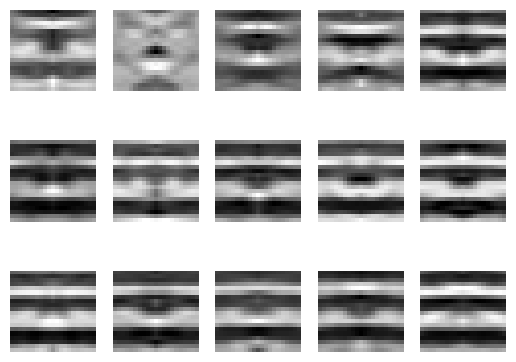

In [8]:
from matplotlib import pyplot as plt
num_example_averages = 15
plt.figure()
for i in range(num_example_averages):
    plt.subplot(3, 5, i+1)
    plt.imshow(np.concatenate((all_avgs[i, :, -1:0:-1], all_avgs[i]), axis=1), cmap='gray')
    plt.axis('off')
plt.show()

## Perform clustering with two different methods

In [15]:
from surforama.utils.twoD_averages import cluster_averages, get_2D_mask
# Define masks to focus cross-correlation on the center of the images
masks = [
    get_2D_mask(
        distance_top=6,
        distance_bottom=6,
        distance_side=0,
        shape=avg.shape
    ) for avg in all_avgs
]

labels_spectral = cluster_averages(all_avgs, masks, method="spectral_clustering")
labels_affinity = cluster_averages(all_avgs, masks, method="affinity_propagation")

### Look at cluster averages

Class averages for spectral clustering:


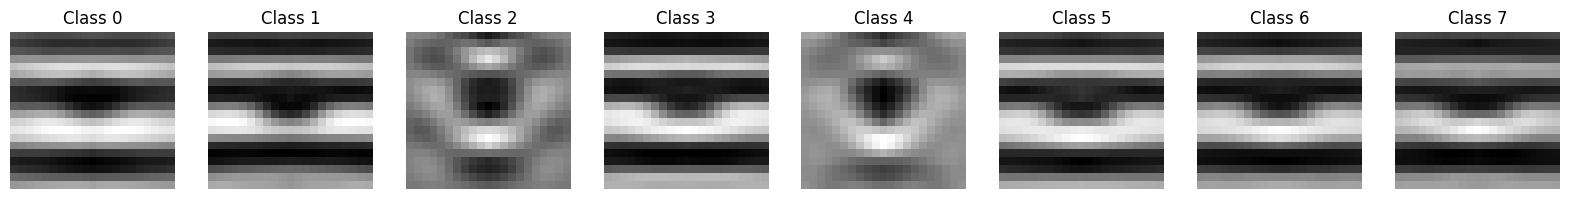



Class averages for affinity propagation:


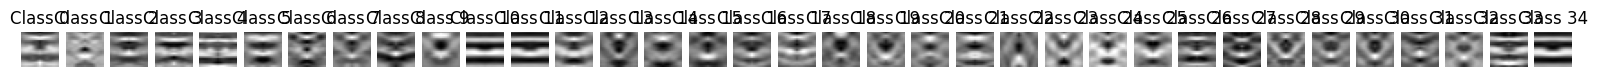

In [18]:
def plot_class_averages(avgs, labels, mirror=False):
    plt.figure(figsize=(20, 5) )
    num_classer_per_row = 7
    num_classes = len(np.unique(labels))
    num_rows = int(np.ceil(num_classes / num_classer_per_row))
    
    for class_nr in np.unique(labels):
        avgs = np.array(avgs)
        class_avg = np.mean(avgs[labels == class_nr], axis=0)
        plt.subplot(1, len(np.unique(labels)), class_nr + 1)
        if mirror:
            class_avg = np.concatenate((class_avg[:, -1:0:-1], class_avg), axis=1)
        plt.imshow(class_avg, cmap='gray')
        # plt.imshow(masks[0], cmap='gray', alpha=0.5)
        plt.axis('off')
        plt.title(f"Class {class_nr}")
    plt.show()

print("Class averages for spectral clustering:")
plot_class_averages(all_avgs, labels_spectral, mirror=True)
print("")
print("")
print("Class averages for affinity propagation:")
plot_class_averages(all_avgs, labels_affinity, mirror=True)

### Look at all class samples

Class 0 for spectral clustering:


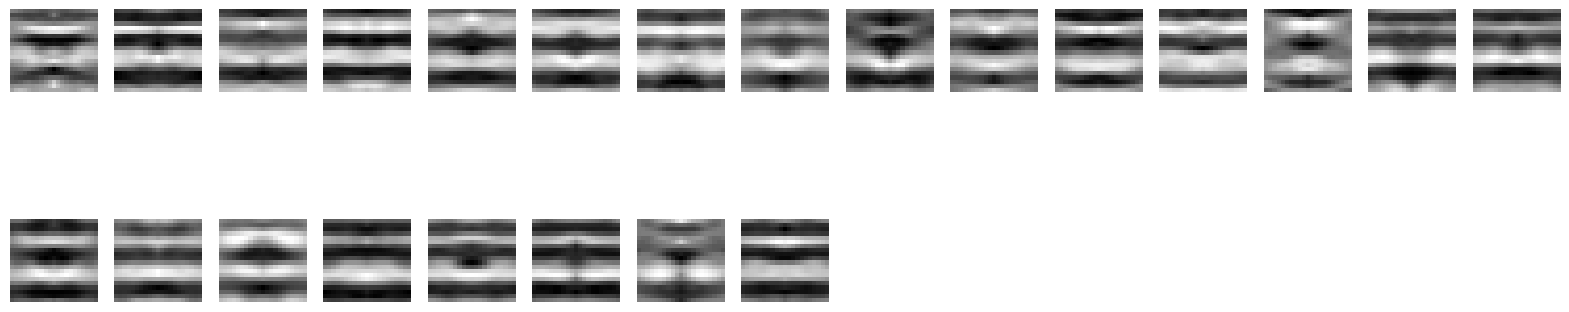

Class 1 for spectral clustering:


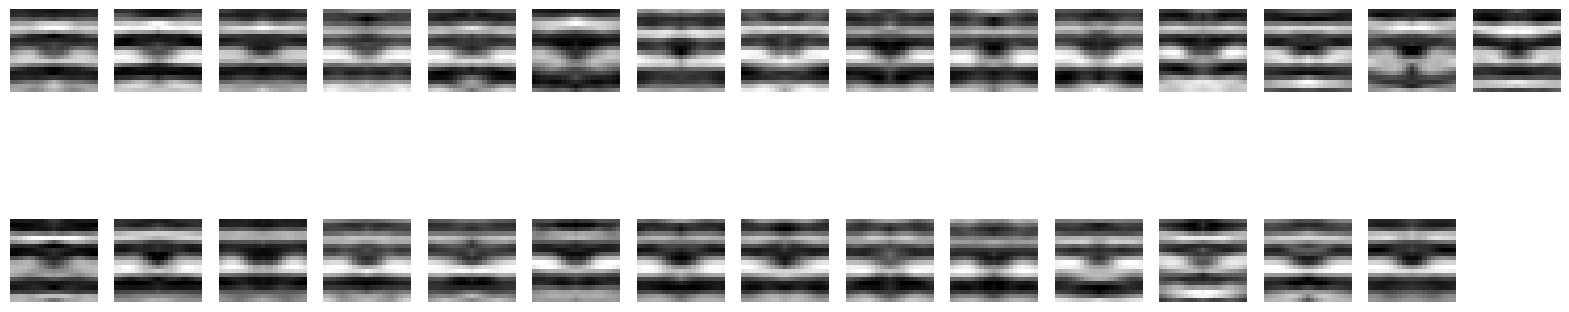

Class 2 for spectral clustering:


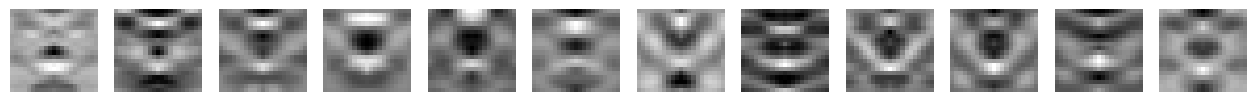

Class 3 for spectral clustering:


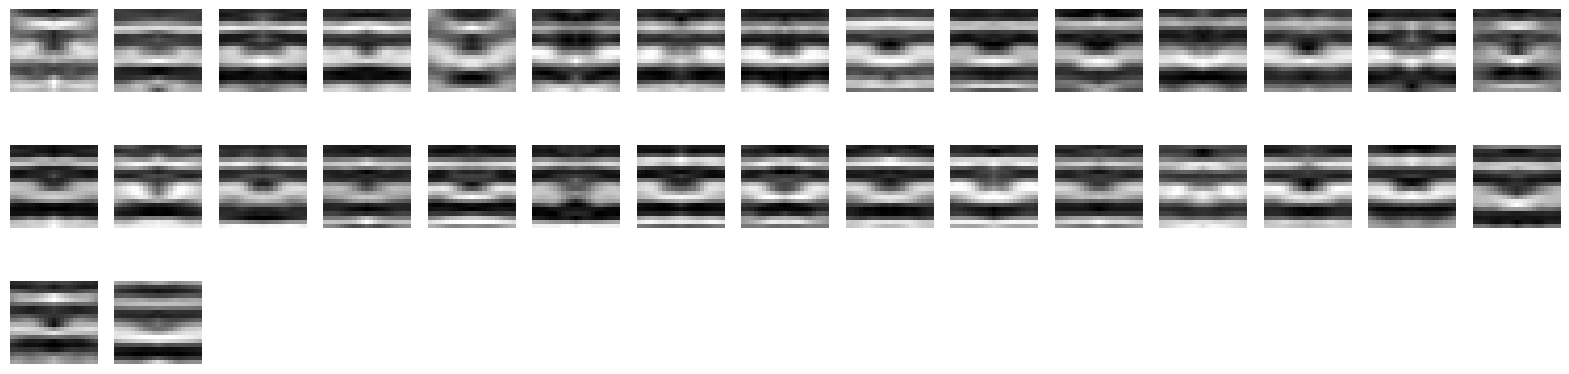

Class 4 for spectral clustering:


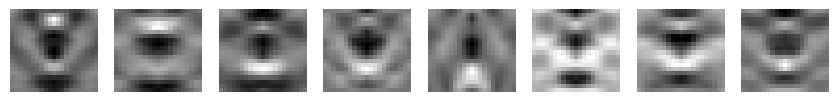

Class 5 for spectral clustering:


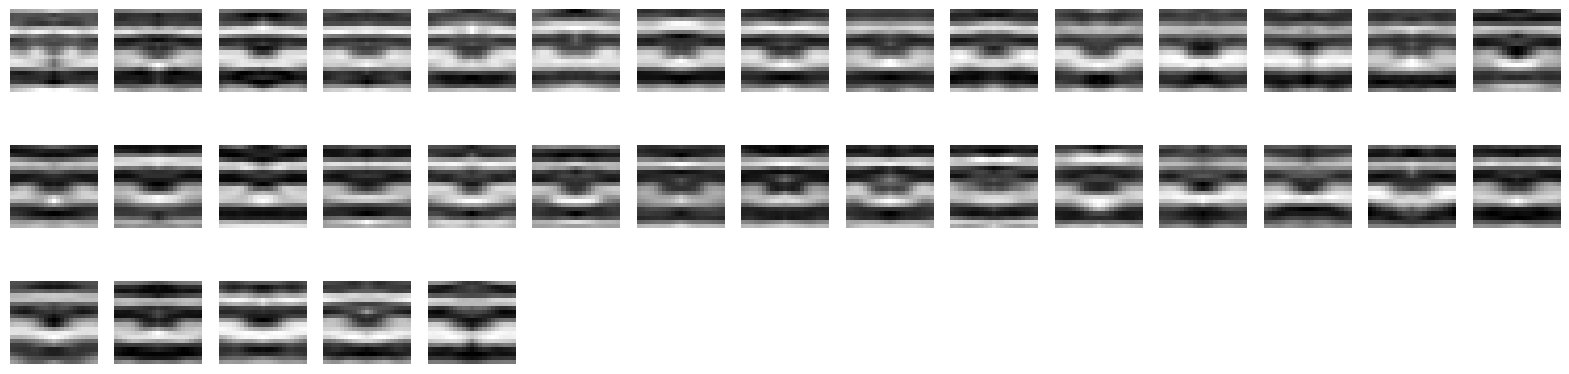

Class 6 for spectral clustering:


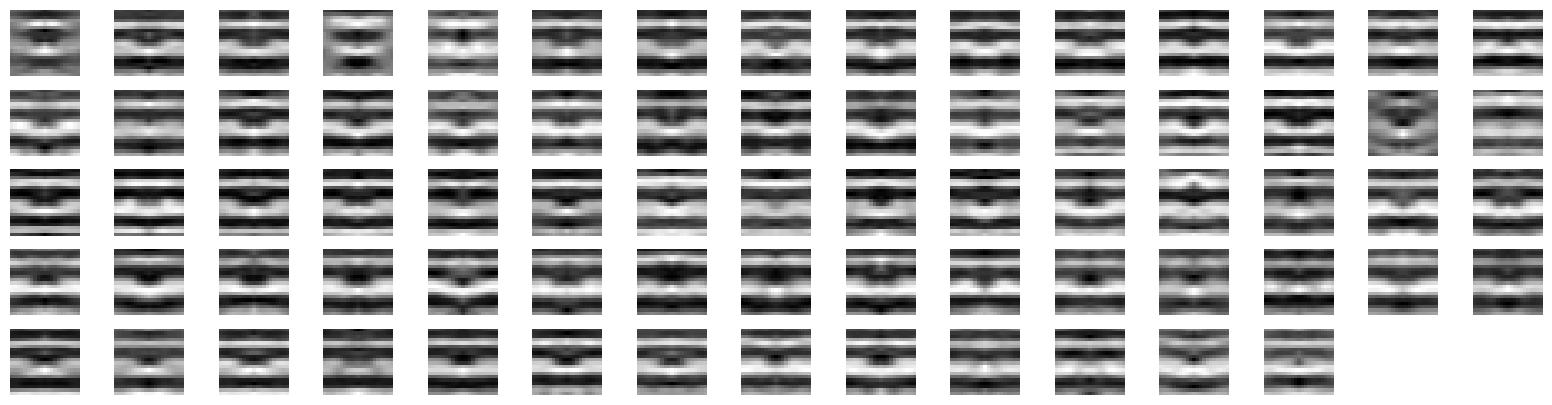

Class 7 for spectral clustering:


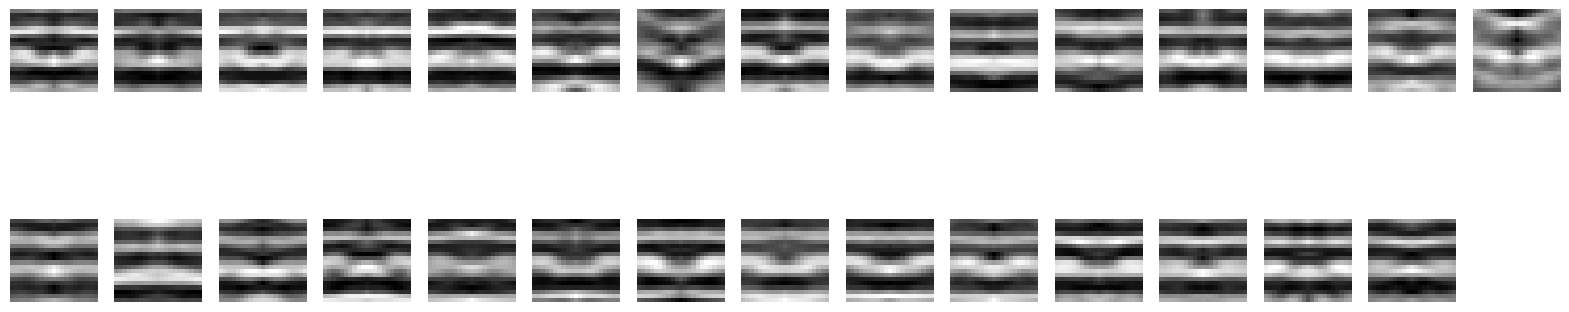



Class 0 for affinity propagation:


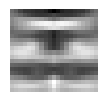

Class 1 for affinity propagation:


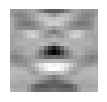

Class 2 for affinity propagation:


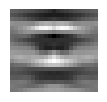

Class 3 for affinity propagation:


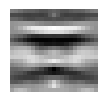

Class 4 for affinity propagation:


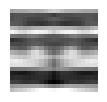

Class 5 for affinity propagation:


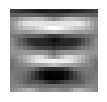

Class 6 for affinity propagation:


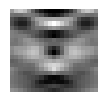

Class 7 for affinity propagation:


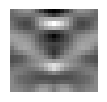

Class 8 for affinity propagation:


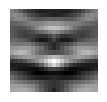

Class 9 for affinity propagation:


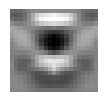

Class 10 for affinity propagation:


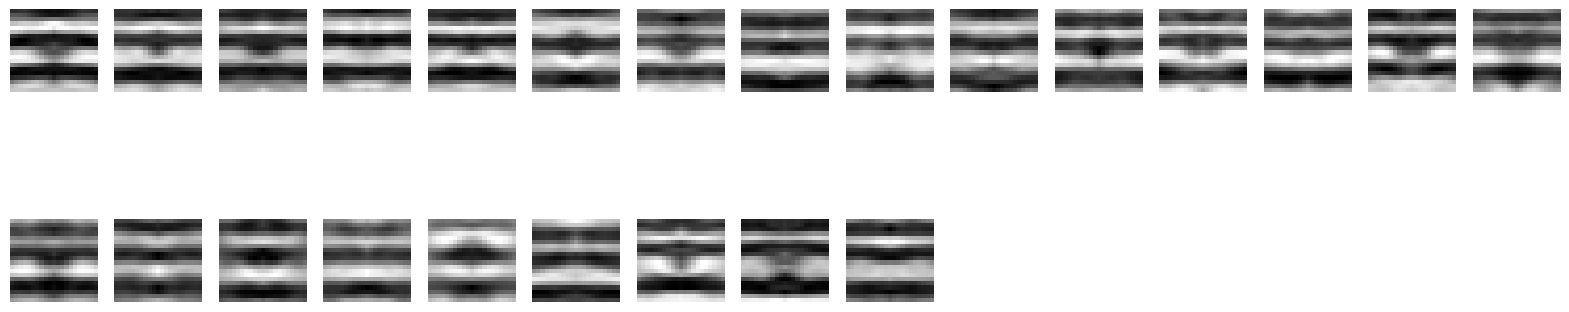

Class 11 for affinity propagation:


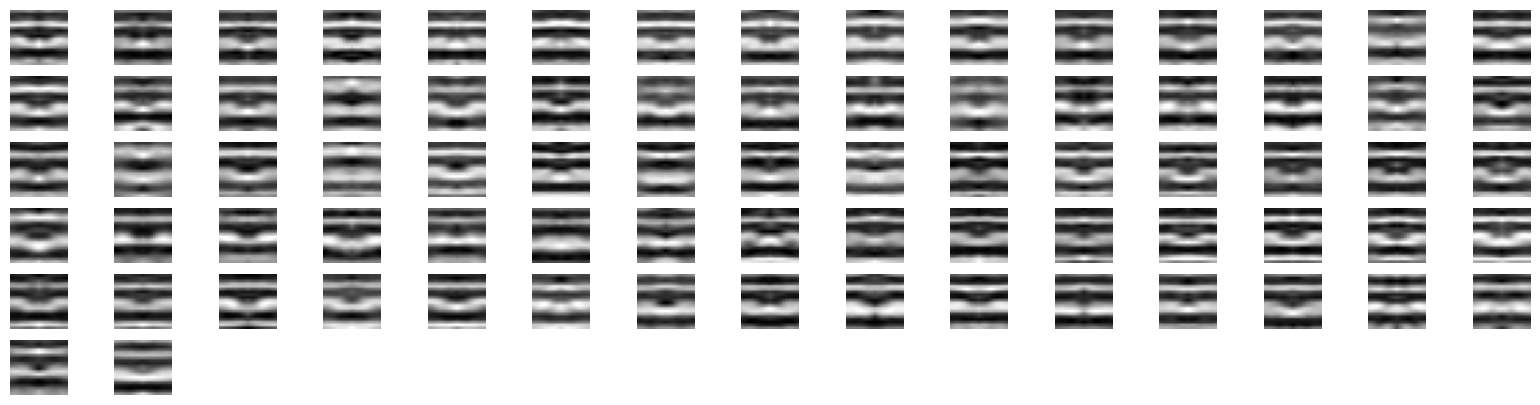

Class 12 for affinity propagation:


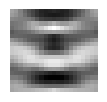

Class 13 for affinity propagation:


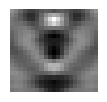

Class 14 for affinity propagation:


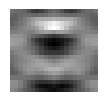

Class 15 for affinity propagation:


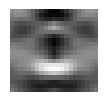

Class 16 for affinity propagation:


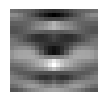

Class 17 for affinity propagation:


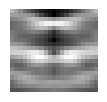

Class 18 for affinity propagation:


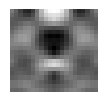

Class 19 for affinity propagation:


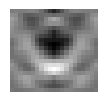

Class 20 for affinity propagation:


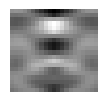

Class 21 for affinity propagation:


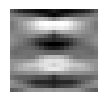

Class 22 for affinity propagation:


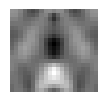

Class 23 for affinity propagation:


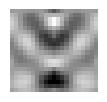

Class 24 for affinity propagation:


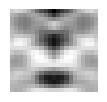

Class 25 for affinity propagation:


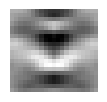

Class 26 for affinity propagation:


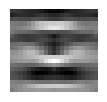

Class 27 for affinity propagation:


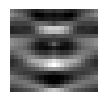

Class 28 for affinity propagation:


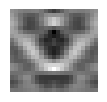

Class 29 for affinity propagation:


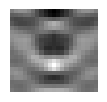

Class 30 for affinity propagation:


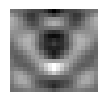

Class 31 for affinity propagation:


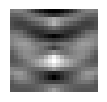

Class 32 for affinity propagation:


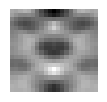

Class 33 for affinity propagation:


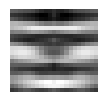

Class 34 for affinity propagation:


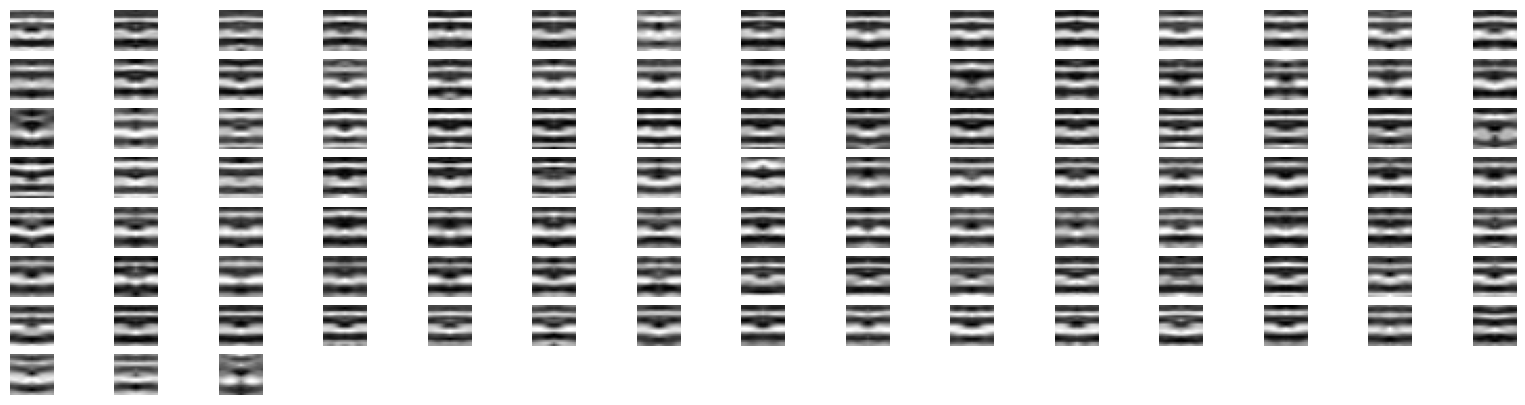

In [17]:
from matplotlib import pyplot as plt

def plot_class(class_nr, avgs, labels, mirror=False):
    plt.figure(figsize=(20, 5))
    num_cols = 15
    num_elements = np.sum(labels == class_nr)
    num_rows = num_elements // num_cols + 1
    count = 0
    for i in range(len(labels)):
        if labels[i] != class_nr:
            continue
        count += 1
        plt.subplot(num_rows, num_cols, count)
        if mirror:
            plt.imshow(np.concatenate((avgs[i][:, -1:0:-1], avgs[i]), axis=1), cmap='gray')
        else:
            plt.imshow(avgs[i], cmap='gray')
        plt.axis('off')
    plt.show()

for class_nr in np.unique(labels_spectral):
    print(f"Class {class_nr} for spectral clustering:")
    plot_class(class_nr, all_avgs, labels_spectral, mirror=True)

print("")
print("")
for class_nr in np.unique(labels_affinity):
    print(f"Class {class_nr} for affinity propagation:")
    plot_class(class_nr, all_avgs, labels_affinity, mirror=True)